In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("..\\dataset_machine_learning.csv")

# Déclaration initiale de df_results
df_results = pd.DataFrame(columns=['Modèle', 'Score_best', 'score'])

In [3]:
df

date    price  bedrooms  bathrooms  sqm_living  sqm_lot  floors  \
0         0   790000         3       2.50      241.55   441.29     1.0   
1         0   555000         4       2.50      307.51   603.87     2.0   
2         0   440000         4       2.25      200.67   754.28     1.0   
3         0   295000         2       2.50      151.43   127.09     2.0   
4         0   470000         5       2.50      205.32   896.98     1.0   
...     ...      ...       ...        ...         ...      ...     ...   
19251   377   183000         3       1.00      108.70   680.05     1.0   
19252   377   359000         2       2.75      127.28   105.91     2.0   
19253   378   450000         5       2.00      173.73   682.28     1.5   
19254   387   445500         2       1.75      129.14   619.66     1.0   
19255   390  1310000         4       2.25      348.39   464.52     2.0   

       waterfront  view  condition  grade  yr_built  renovated  yr_renovated  \
0           False     0          4      9      1951      False          1951   
1           False     0          3      8      2012      False          2012   
2           False     0          3      8      1966      False          1966   
3           False     0          3      7      2009      False          2009   
4           False     0          3      8      1976      False          1976   
...           ...   ...        ...    ...       ...        ...           ...   
19251       False     0          3      7      1962      False          1962   
19252       False     0          3      8      2009      False          2009   
19253       False     0          3      7      1960      False          1960   
19254       False     0          3      6      1941      False          1941   
19255       False     0          5      8      1924      False          1924   

       zipcode  city_encoded      lat     long  sqm_living15  sqm_lot15  
0        98117            11  47.6833 -122.400        221.11     441.29  
1        98065            15  47.5150 -121.870        221.11     464.52  
2        98006            21  47.5443 -122.177        171.87     836.13  
3        98106            11  47.5489 -122.363        147.72     214.23  
4        98011            14  47.7698 -122.222        193.24     802.03  
...        ...           ...      ...      ...           ...        ...  
19251    98188            11  47.4685 -122.282        189.52     680.05  
19252    98133            11  47.7052 -122.343        127.28     101.26  
19253    98007            21  47.5951 -122.144        173.73     710.71  
19254    98115            11  47.6914 -122.308         85.47     592.72  
19255    98115            11  47.6747 -122.303        201.60     426.42  

[19256 rows x 20 columns]

Mise en forme des dataset Train/Test

In [25]:
X = df[['bathrooms', 'waterfront', 'grade', 'city_encoded', 'lat', 'bedrooms', 'view', 'long', 'condition', 'floors', 'sqm_living', 'sqm_living15']]
y = df['price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Modele lineaire ElasticNet

Recherche du meilleur modele

In [26]:
# Création d'un pipeline avec mise à l'échelle des caractéristiques et régression ElasticNet
pipeline = make_pipeline(StandardScaler(), ElasticNet(max_iter=1000))  # Augmentez max_iter si nécessaire

linear_param_grid = {
    "elasticnet__alpha": [0],
    "elasticnet__l1_ratio": [0.9],
    "elasticnet__fit_intercept": [True],
    "elasticnet__max_iter": [20, 50, 100],
    'elasticnet__tol': [0.00000001]
}

# Entraînement du modèle avec recherche par grille
grid = GridSearchCV(pipeline, linear_param_grid, scoring='r2', cv=5)
grid.fit(X, y)

# Affichage des meilleurs paramètres et score
print(f"Best score = {grid.best_score_}")
print(f"Best param = {grid.best_params_}")


c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.529e+14, tolerance: 1.628e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

Best score = 0.691236882772628
Best param = {'elasticnet__alpha': 0, 'elasticnet__fit_intercept': True, 'elasticnet__l1_ratio': 0.9, 'elasticnet__max_iter': 50, 'elasticnet__tol': 1e-08}


c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.471e+14, tolerance: 1.651e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent w

Comparaison des scores

In [26]:
# Modele simple
model_name = "ElasticNet"
print("Modele avec hyperparametres par defaut")
eNet_model = ElasticNet()
eNet_model.fit(X_train, y_train)

score_simple = eNet_model.score(X_test, y_test)
print(f"Score = {score_simple}")

# Meilleur modele
print("Modele avec les meilleurs hyperparametres")
eNet_model_best = ElasticNet(alpha=0, l1_ratio=0.9, max_iter=50, tol=0.00000001)

eNet_model_best.fit(X_train, y_train)

score_simple_best = eNet_model_best.score(X_test, y_test)
print(f"Score = {score_simple_best}")

model_row = pd.DataFrame({'Modèle': model_name, 'Score_best': score_simple_best, 'score' : score_simple}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

Modele avec hyperparametres par defaut
Score = 0.6408661242083843
Modele avec les meilleurs hyperparametres


c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Score = 0.7106211011564023


c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.561e+14, tolerance: 1.649e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Verification overfitting

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.812e+11, tolerance: 7.674e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

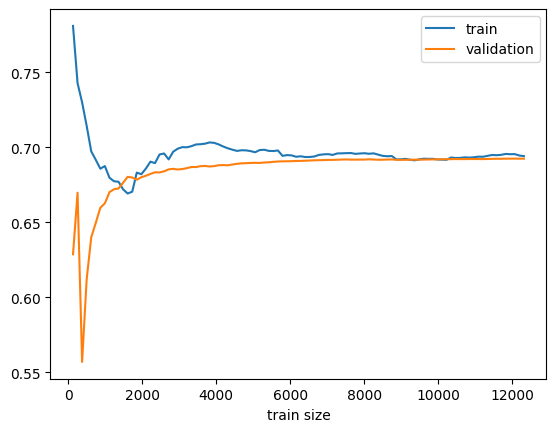

In [23]:
N, train_score, val_score = learning_curve(eNet_model_best, X_train, y_train, train_sizes=np.linspace(0.01, 1, 100))

plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("train size")
plt.legend()

Le score stagne avec la taille de l'echantillon d'entrainement alors nous ne sommes pas en overfitting!

Modele KNN

Recherche du meilleur modele

In [5]:
knn_model = KNeighborsRegressor()

knn_param_grid = {
                    "n_neighbors" : [20], 
                    "metric" : ["euclidean", "manhattan", "minkowski"],
                    "weights" : ["uniform", "distance"],
                    "algorithm" : ["auto"]
                  }

grid = GridSearchCV(knn_model, knn_param_grid, scoring='r2', cv =10)
grid.fit(X_train, y_train)

print(f"Best score = {grid.best_score_}")
print(f"Best param = {grid.best_params_}")

Best score = 0.6385298109569304
Best param = {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}


Comparaison des scores

In [27]:
# Modele simple
model_name = "KNeighborsRegressor"
print("Modele avec hyperparametres par defaut")
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

score_simple = knn_model.score(X_test, y_test)
print(f"Score = {score_simple}")

# Meilleur modele
print("Modele avec les meilleurs hyperparametres")
knn_model_best = KNeighborsRegressor(algorithm="auto", metric="manhattan", n_neighbors=20, weights="distance")

knn_model_best.fit(X_train, y_train)

score_simple_best = knn_model_best.score(X_test, y_test)
print(f"Score = {score_simple_best}")

model_row = pd.DataFrame({'Modèle': model_name, 'Score_best': score_simple_best, 'score' : score_simple}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

Modele avec hyperparametres par defaut
Score = 0.5384138102198184
Modele avec les meilleurs hyperparametres
Score = 0.6302890873134127


Verification overfitting

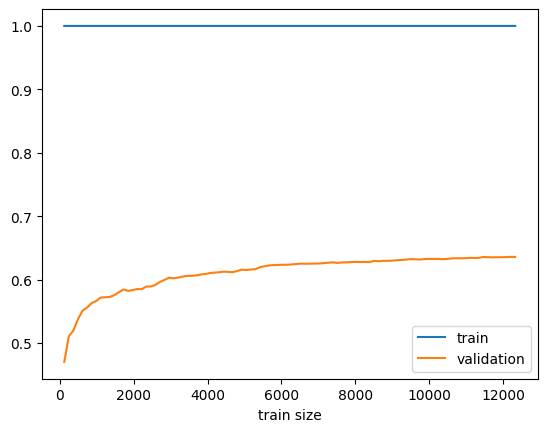

In [7]:
N, train_score, val_score = learning_curve(knn_model_best, X_train, y_train, train_sizes=np.linspace(0.01, 1, 100))

plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("train size")
plt.legend()

Le score augmente avec la taille de l'echantillon d'entrainement alors nous ne sommes pas en overfitting!

Modele Random Forest

Recherche du meilleur modele

In [8]:
RandomForest_model = RandomForestRegressor()

RandomForest_param_grid = {
                            'n_estimators': [100, 200, 500],
                            'max_depth': [2, 5, 10],
                            'min_samples_split': [1, 5, 10],
                            'min_samples_leaf': [1, 5, 10]
                          }

grid = GridSearchCV(RandomForest_model, RandomForest_param_grid, scoring='r2', cv =10)
grid.fit(X_train, y_train)

print(f"Best score = {grid.best_score_}")
print(f"Best param = {grid.best_params_}")

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

Best score = 0.5033901009153409
Best param = {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

Comparaison des scores

In [28]:
# Modele simple
model_name = "RandomForestRegressor"
print("Modele avec hyperparametres par defaut")
RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(X_train, y_train)

score_simple = RandomForest_model.score(X_test, y_test)
print(f"Score = {score_simple}")

# Meilleur modele
print("Modele avec les meilleurs hyperparametres")
RandomForest_model_best = RandomForestRegressor(max_depth = 5, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 200)

RandomForest_model_best.fit(X_train, y_train)

score_simple_best = RandomForest_model_best.score(X_test, y_test)
print(f"Score = {score_simple_best}")

model_row = pd.DataFrame({'Modèle': model_name, 'Score_best': score_simple_best, 'score' : score_simple}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

Modele avec hyperparametres par defaut


c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Score = 0.8844557002768783
Modele avec les meilleurs hyperparametres


c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Score = 0.7633643281251944


Verification overfitting

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

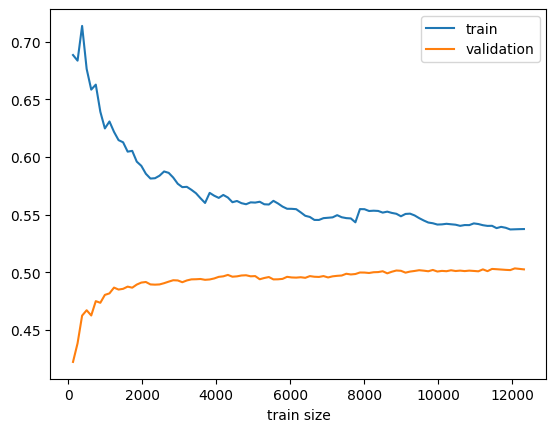

In [18]:
N, train_score, val_score = learning_curve(RandomForest_model_best, X_train, y_train, train_sizes=np.linspace(0.01, 1, 100))

plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("train size")
plt.legend()

Modele SVR

Recherche du meilleur modele

In [ ]:
model_SVR = SVR() 
 
SVR_param_grid = { 
                            'kernel' :["linear", "poly", "rbf", "sigmoid"], 
                            'degree' : [1, 2, 3], 
                            'tol' : [0, 0.00000000001, 0.000000001], 
                            "max_iter" : [20, 50, 100], 
                            'C' : [2,5, 10], 
                            'coef0' : [0, 0.00000001, 0.000001] 
                          } 
 
grid = GridSearchCV(model_SVR, SVR_param_grid, scoring='r2', cv =10) 
grid.fit(X_train, y_train) 
 
print(f"Best score = {grid.best_score_}") 
print(f"Best param = {grid.best_params_}")

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated earl

Best score = -0.9597276031314014
Best param = {'C': 2, 'coef0': 1e-06, 'degree': 3, 'kernel': 'poly', 'max_iter': 100, 'tol': 1e-11}


Comparaison des scores

In [29]:
# Modele simple
model_name = "SVR"
print("Modele avec hyperparametres par defaut")
model_SVR = SVR() 
model_SVR.fit(X_train, y_train)

score_simple = model_SVR.score(X_test, y_test)
print(f"Score = {score_simple}")

# Meilleur modele
print("Modele avec les meilleurs hyperparametres")
SVR_model_best = SVR(C= 5, coef0= 0, degree= 1, kernel= 'linear', max_iter= 50, tol = 1e-11)

SVR_model_best.fit(X_train, y_train)

score_simple_best = SVR_model_best.score(X_test, y_test)
print(f"Score = {score_simple_best}")

model_row = pd.DataFrame({'Modèle': model_name, 'Score_best': score_simple_best, 'score' : score_simple}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

Modele avec hyperparametres par defaut


c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score = -0.059539032309186446
Modele avec les meilleurs hyperparametres


c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Score = 0.42853359014289416


Verification overfitting

c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Consultant\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated earl

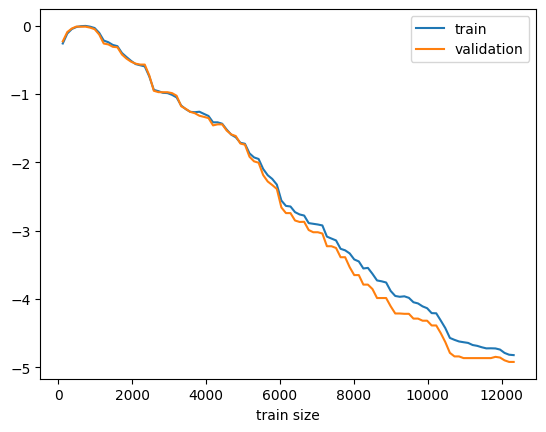

In [31]:
N, train_score, val_score = learning_curve(SVR_model_best, X_train, y_train, train_sizes=np.linspace(0.01, 1, 100))

plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("train size")
plt.legend()

Modele Polynomial

Recherche du meilleur modele

In [ ]:
degrees = range(1,10)
best_score = 0
best_degree = 0
for degree in degrees:
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.fit_transform(X_test)
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(X_train_poly, y_train)
    scores = polynomial_regressor.score(X_test_poly, y_test)
    if scores > best_score:
        best_score = scores
        best_degree = degree
        
print(f'Best Score = {best_score}')
print(f'Best degree = {best_degree}')

Best Score = 0.8218222337650497
Best degree = 2


Comparaison des scores

In [22]:
# Modele simple
model_name = "PolynomialFeatures"
print("Modele avec hyperparametres par defaut")
poly_features = PolynomialFeatures()
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
polynomial_regressor = LinearRegression()

polynomial_regressor.fit(X_train_poly, y_train)

score_simple = polynomial_regressor.score(X_test_poly, y_test)
print(f"Score = {score_simple}")

# Meilleur modele
print("Modele avec les meilleurs hyperparametres")
poly_features_best = PolynomialFeatures(5)
X_train_poly_best = poly_features_best.fit_transform(X_train)
X_test_poly_best = poly_features_best.fit_transform(X_test)
best_polynomial_regressor = LinearRegression()

best_polynomial_regressor.fit(X_train_poly_best, y_train)

score_simple_best = best_polynomial_regressor.score(X_test_poly_best, y_test)
print(f"Score = {score_simple_best}")

model_row = pd.DataFrame({'Modèle': model_name, 'Score_best': score_simple_best, 'score' : score_simple}, index=[0])

# Ajout de la ligne au DataFrame existant
df_results = pd.concat([df_results, model_row], ignore_index=True)

Modele avec hyperparametres par defaut
Score = 0.8050132326682675
Modele avec les meilleurs hyperparametres


: 

: 

Verification overfitting

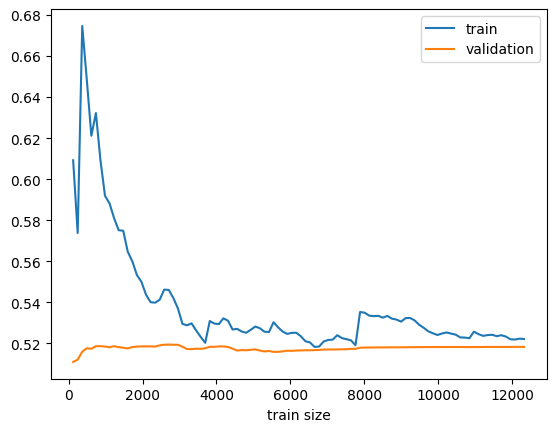

In [35]:
N, train_score, val_score = learning_curve(best_polynomial_regressor, X_train_poly_best, y_train, train_sizes=np.linspace(0.01, 1, 100))

plt.plot(N, train_score.mean(axis=1), label="train")
plt.plot(N, val_score.mean(axis=1), label="validation")
plt.xlabel("train size")
plt.legend()

Tracé

Tracé comparaison

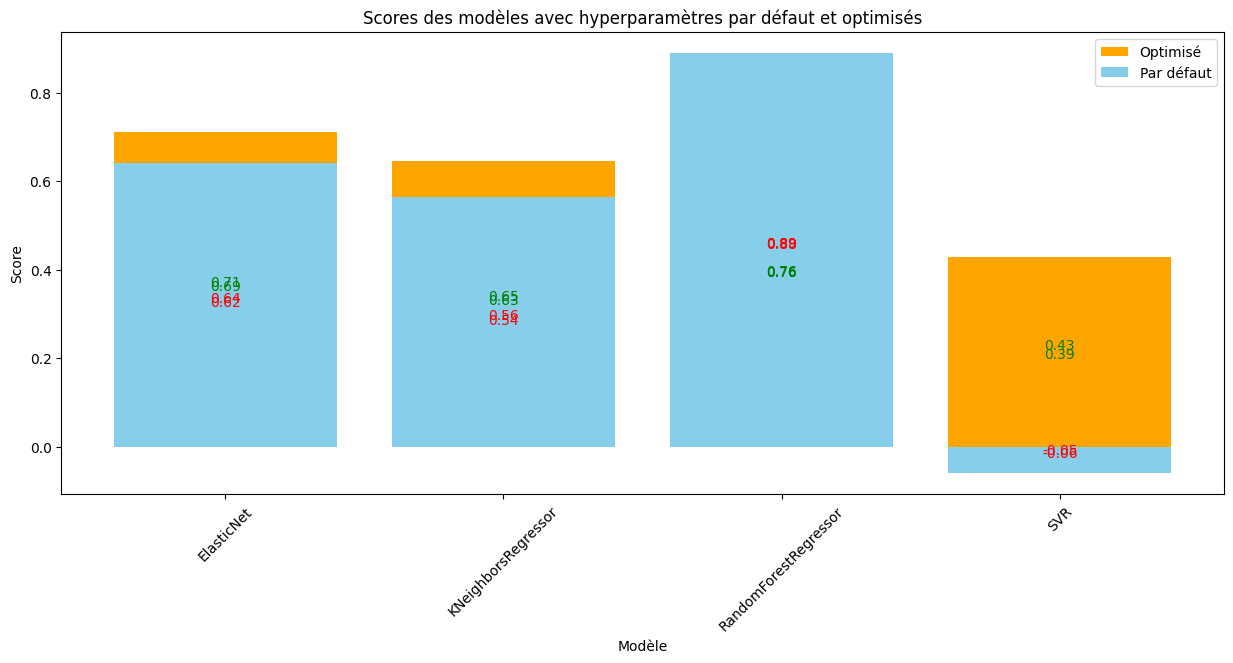

In [31]:
# Trier le DataFrame selon le nom du modèle
df_results_sorted = df_results.sort_values(by='Modèle')

# Tracer les scores des modèles avec les hyperparamètres par défaut et optimisés
plt.figure(figsize=(15, 6))
bars_optimized = plt.bar(df_results_sorted['Modèle'], df_results_sorted['Score_best'], color='orange', label='Optimisé')
bars_default = plt.bar(df_results_sorted['Modèle'], df_results_sorted['score'], color='skyblue', label='Par défaut')
plt.xlabel('Modèle')
plt.ylabel('Score')
plt.title('Scores des modèles avec hyperparamètres par défaut et optimisés')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.legend()

# Ajouter les valeurs des scores au-dessus des barres
for bar in bars_default:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, round(yval, 2), ha='center', va='bottom', color='red')

for bar in bars_optimized:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, round(yval, 2), ha='center', va='bottom', color='green')
plt.show()
